# MD4424 Horizontal Tune Scan
- MD data already analysed on SWAN, loaded here as a pandas dataframe saved via pickle
- Here we load the simulated bunch distributions and analyse them in the same way as the MD data to compare

###  Load functions and imports etc

In [16]:
%run ./MD_Functions.ipynb


	Importing MD Analysis functions for MD4224


### Make a directory for output plots

In [2]:
path = './H_Plots'
make_directory(path)
path = './H_Plots/MD'
make_directory(path)
path = './H_Plots/WS_tomo'
make_directory(path)
path = './H_Plots/WS_BLonD'
make_directory(path)
path = './H_Sim_Dataframes'
make_directory(path)

Creation of the directory ./H_Plots failed
Creation of the directory ./H_Plots/MD failed
Creation of the directory ./H_Plots/WS_tomo failed
Creation of the directory ./H_Plots/WS_BLonD failed
Creation of the directory ./H_Sim_Dataframes failed


###  Load and check MD dataframe

In [3]:
df0 = pnd.read_pickle('MD_Dataframes/MD4224_HighBrightness_Horizontal_Using_Sim_Optics_Complete.pkl')

In [4]:
df0

,PR.BWS.65.H_ROT:ACQ_DELAY,PR.BWS.65.H_ROT:PROF_POSITION_IN,PR.BWS.65.H_ROT:PROF_DATA_IN,cycleStamp,2ndMoment H,sig H,sig errH,A H,mu H,position H,...,intensity,losses,ratio,emittance H,betx,bety,dx,emittance H noDisp,emittance H 2ndMoment noDisp,emittance H 2ndMoment
2018-09-04 08:30:23.500,172.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.173300683154985, 0.173502430703752, 0.17249...",1.536050e+09,4.376493,4.411930986822637,0.010816,7.104645728686517,-2.737597599968522,"[-26.44740240003148, -26.31840240003148, -26.2...",...,7.301678e+11,1.755472,0.982445,1.072059,22.435882,11.715731,3.413603,1.960295,1.928930,1.040693
2018-09-04 08:31:07.900,172.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.174717857718864, 0.17512488920122, 0.174514...",1.536050e+09,4.259797,4.385077923670447,0.011540,6.889804203620628,-2.6681059516376338,"[-26.289894048362363, -26.192894048362366, -26...",...,7.119099e+11,1.411161,0.985888,1.039390,22.392001,11.721015,3.434507,1.940300,1.831016,0.930105
2018-09-04 08:31:52.300,172.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.17573721506667, 0.175532868924527, 0.176556...",1.536050e+09,4.351413,4.434069219375807,0.010679,6.972747213985072,-2.6428228411117747,"[-26.575177158888224, -26.380177158888223, -26...",...,7.243861e+11,1.241589,0.987584,1.073654,22.339713,11.726460,3.457001,1.988541,1.915094,1.000208
2018-09-04 08:33:21.100,172.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.175941799097855, 0.17512488920122, 0.175737...",1.536050e+09,4.377512,4.468284998488029,0.011512,6.719656512893831,-2.4287820659879413,"[-26.789217934012058, -26.62721793401206, -26....",...,7.017158e+11,1.237806,0.987622,1.084702,22.207503,11.737483,3.506113,2.031370,1.949674,1.003006
2018-09-04 08:34:49.900,172.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.17573721506667, 0.17573721506667, 0.1755328...",1.536050e+09,4.517287,4.5937560326213065,0.010113,6.964483463383702,-3.0145971809522223,"[-27.43940281904778, -27.34140281904778, -27.3...",...,7.227126e+11,0.887386,0.991126,1.180333,22.035852,11.748196,3.559735,2.163780,2.092342,1.108895
2018-09-04 08:36:18.700,172.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.177587068653147, 0.178000784393168, 0.17862...",1.536050e+09,4.846255,4.697891178560968,0.010267,6.71314396867442,-3.028327388635603,"[-28.1416726113644, -27.979672611364396, -27.9...",...,6.959341e+11,0.570801,0.994292,1.257748,21.797181,11.759253,3.623272,2.287772,2.434553,1.404530
2018-09-04 08:37:47.500,172.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.174717857718864, 0.173502430703752, 0.17471...",1.536050e+09,4.704099,4.927503294667217,0.013057,6.990972365092053,-3.3162589470865695,"[-29.48574105291343, -29.453741052913433, -29....",...,7.231689e+11,0.779939,0.992201,1.465642,21.467022,11.770369,3.698824,2.555578,2.329101,1.239165
2018-09-04 08:39:16.300,172.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.177380571512742, 0.178208003552817, 0.17758...",1.536050e+09,5.061085,5.176246325534791,0.017240,6.713900226898849,-3.394103806486972,"[-31.011896193513028, -30.87989619351303, -30....",...,7.043024e+11,1.211873,0.987881,1.712388,20.999678,11.781491,3.791097,2.882865,2.756016,1.585539
2018-09-04 08:40:45.100,172.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.17635168193542, 0.176762519656597, 0.176351...",1.536050e+09,5.892221,5.866034303890619,0.019750,6.902342903858677,-3.474954237427583,"[-35.17304576257242, -35.10704576257242, -34.9...",...,7.249947e+11,1.536863,0.984631,2.542526,20.300948,11.792737,3.909099,3.829834,3.864104,2.576795
2018-09-04 08:42:13.900,175.0,"[-51928.0, -51928.0, -51928.0, -51928.0, -5192...","[0.174921255067789, 0.175532868924527, 0.17512...",1.536051e+09,4.351022,4.416157449662227,0.010081,7.222033873364809,-2.448335591030603,"[-26.4446644089694, -26.347664408969397, -26.2...",...,7.380797e+11,1.902385,0.980976,1.075733,22.435503,11.715780,3.413798,1.964086,1.906575,1.018223


### Create a dictionary to organise shots by distinct working point

In [5]:
# These are our tune points:
scan_points = np.linspace(607, 621, 15);
scan_points = scan_points/100;
print '\nscan_points = ', scan_points

Qx_points=[]
for i in scan_points:
    Qx_points.append(round_sig(i,5))
print '\nQx_points = ', Qx_points

Qx_point_separation = Qx_points[1] - Qx_points[0]
Qx_pt_sep = Qx_point_separation/2
print '\nTune points separated by +/- ', Qx_pt_sep

# Make dictionary of nearest tune point and iterators
tune_points = {}
for i in Qx_points:
    tune_points[i] = np.where(np.logical_and(np.greater_equal(df0['Qx'], (i-Qx_pt_sep-6)), np.less_equal(df0['Qx'], (i+Qx_pt_sep-6)) ) )[0]
print '\ntune_points dictionary:\n'
tune_points


scan_points =  [6.07 6.08 6.09 6.1  6.11 6.12 6.13 6.14 6.15 6.16 6.17 6.18 6.19 6.2
 6.21]

Qx_points =  [6.07, 6.08, 6.09, 6.1, 6.11, 6.12, 6.13, 6.14, 6.15, 6.16, 6.17, 6.18, 6.19, 6.2, 6.21]

Tune points separated by +/-  0.005

tune_points dictionary:



{6.07: array([187, 202, 209, 217]),
 6.08: array([  8,  15,  23,  31,  39,  46,  54,  62,  76,  84,  91,  99, 107,
        114, 128, 136, 142, 148, 155, 163, 171, 179]),
 6.09: array([186, 194, 201, 208, 216, 224]),
 6.1: array([  7,  14,  22,  30,  38,  45,  53,  61,  69,  75,  83,  90,  98,
        106, 113, 121, 127, 135, 141, 154, 162, 170, 178]),
 6.11: array([  6,  21,  29,  37,  52,  60,  68,  82,  89,  97, 105, 112, 120,
        134, 140, 153, 161, 169, 177, 185, 193, 200, 207, 215, 223]),
 6.12: array([ 44, 184, 192, 199, 206, 214, 222]),
 6.13: array([  5,  13,  20,  28,  36,  43,  51,  59,  67,  74,  81,  96, 104,
        111, 119, 126, 133, 147, 160, 168, 176]),
 6.14: array([183, 191, 198, 205, 213, 221]),
 6.15: array([  4,  12,  19,  27,  35,  50,  58,  66,  73,  80,  88,  95, 103,
        110, 118, 125, 132, 146, 152, 159, 167, 175]),
 6.16: array([182, 190, 197, 204, 212, 220]),
 6.17: array([  3,  11,  18,  26,  34,  42,  49,  57,  65,  72,  79,  87,  94,
        102,

In [6]:
x_ticks = [6.06, 6.08, 6.10, 6.12, 6.14, 6.16,  6.18, 6.20 , 6.22]

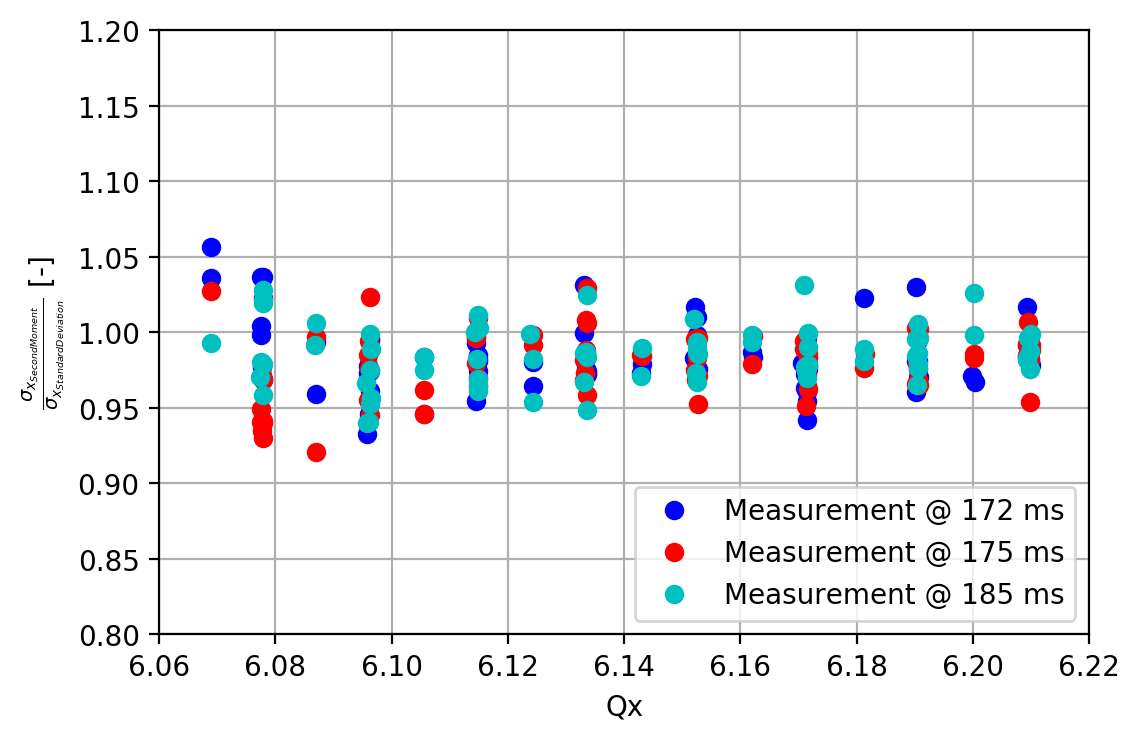

In [7]:
fig=plt.figure(figsize=(6, 4), dpi= 200, facecolor='w', edgecolor='k');
plt.plot(df0['Qx'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)]+6, df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)]/df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)],'bo', label='Measurement @ 172 ms');
plt.plot(df0['Qx'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)]+6, df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)]/df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)],'ro', label='Measurement @ 175 ms');
plt.plot(df0['Qx'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)]+6, df0['2ndMoment H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)]/df0['sig H'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)],'co', label='Measurement @ 185 ms');
plt.xlabel('Qx');
plt.ylabel(r'$\frac{\sigma_{x_{Second Moment}}}{\sigma_{x_{Standard Deviation}}}$ [-]');
plt.legend(loc=4);
#plt.title('Wire Scanner Acquisition Delay');
#plt.xlim(6.075, 6.25);
plt.ylim(0.8, 1.2);
plt.xlim(6.06, 6.22)
plt.xticks(x_ticks)
plt.grid();
fig.savefig('./H_Plots/MD/Gaussianness.png');

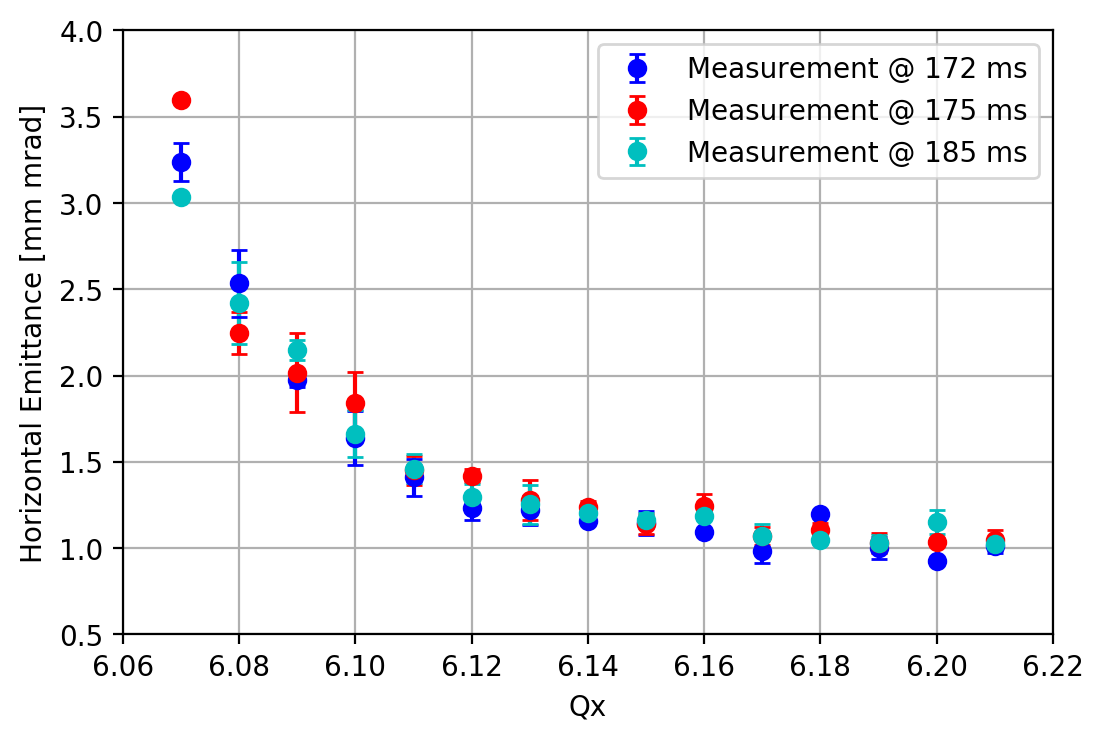

In [8]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(6, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_data_175 = []
y_data_185 = []

y_error_172 = []
y_error_175 = []
y_error_185 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_175.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_data_185.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    y_error_172.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_175.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==175)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_185.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==185)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
    
plt.errorbar(x_data, y_data_172, y_error_172, label='Measurement @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')
plt.errorbar(x_data, y_data_175, y_error_175, label='Measurement @ 175 ms', linestyle='None', marker='o', capsize=3, color='r')
plt.errorbar(x_data, y_data_185, y_error_185, label='Measurement @ 185 ms', linestyle='None', marker='o', capsize=3, color='c')

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

#plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\mu\prime_x^2 - D_x^2 \left(\frac{\delta p}{p}\right)^2}{\beta_{x}(s)}$')

plt.ylim(0.5, 4)
plt.xticks(x_ticks)

plt.legend();
plt.grid();
fig.savefig('H_Plots/MD/H_Emitt_MD_all.png');

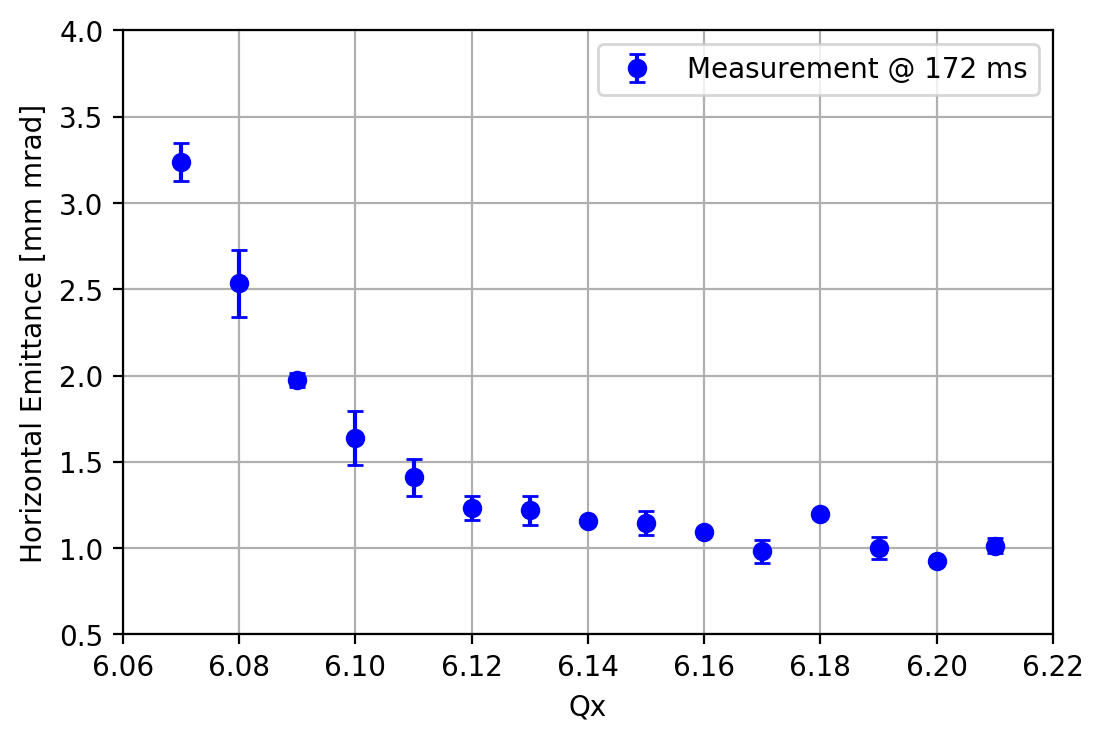

In [9]:
# Plot averaged data points with error bars
fig=plt.figure(figsize=(6, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_172.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
        
plt.errorbar(x_data, y_data_172, y_error_172, label='Measurement @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');
#plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\sigma_x^2 - D_x^2 \left(\frac{\delta p}{p}^2 \right)}{\beta_{x}(s)}$')
#plt.title(r'$\epsilon_{x,y} = \beta\gamma \frac{\sigma^2}{\beta_{x,y}(s)}$')

plt.ylim(0.5, 4)
plt.xticks(x_ticks)

plt.legend();
plt.grid();
fig.savefig('./H_Plots/MD/H_Emitt_MD_172.png');

# Load distributions from simulations data

In [10]:
# Read .mat files into a dictionary

tomo_sims = '06_Full_Simulation_Scan_Tomo'

tomo_matfiles = [
    str('../'+str(tomo_sims)+'/1_H_07/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_08/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_09/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_10/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_11/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_12/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_13/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_14/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_15/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_16/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_17/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_18/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_19/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_20/bunch_output/mainbunch_000874.mat'),
    str('../'+str(tomo_sims)+'/1_H_21/bunch_output/mainbunch_000874.mat')    
]

BLonD_sims = '05_Full_Simulation_Scan_BLonD'

BLonD_matfiles = [
    str('../'+str(BLonD_sims)+'/1_H_07/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_08/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_09/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_10/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_11/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_12/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_13/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_14/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_15/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_16/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_17/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_18/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_19/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_20/bunch_output/mainbunch_000874.mat'),
    str('../'+str(BLonD_sims)+'/1_H_21/bunch_output/mainbunch_000874.mat')    
]

sims_tomo = dict()
sims_BLonD = dict()

for f in tomo_matfiles:    
    str_tune = f.split('/')[2].split('_')[-1]
    sims_tomo[str(str_tune)] = f
    
for f in BLonD_matfiles:    
    str_tune = f.split('/')[2].split('_')[-1]
    sims_BLonD[str(str_tune)] = f

In [11]:
sims_tomo

{'07': '../06_Full_Simulation_Scan_Tomo/1_H_07/bunch_output/mainbunch_000874.mat',
 '08': '../06_Full_Simulation_Scan_Tomo/1_H_08/bunch_output/mainbunch_000874.mat',
 '09': '../06_Full_Simulation_Scan_Tomo/1_H_09/bunch_output/mainbunch_000874.mat',
 '10': '../06_Full_Simulation_Scan_Tomo/1_H_10/bunch_output/mainbunch_000874.mat',
 '11': '../06_Full_Simulation_Scan_Tomo/1_H_11/bunch_output/mainbunch_000874.mat',
 '12': '../06_Full_Simulation_Scan_Tomo/1_H_12/bunch_output/mainbunch_000874.mat',
 '13': '../06_Full_Simulation_Scan_Tomo/1_H_13/bunch_output/mainbunch_000874.mat',
 '14': '../06_Full_Simulation_Scan_Tomo/1_H_14/bunch_output/mainbunch_000874.mat',
 '15': '../06_Full_Simulation_Scan_Tomo/1_H_15/bunch_output/mainbunch_000874.mat',
 '16': '../06_Full_Simulation_Scan_Tomo/1_H_16/bunch_output/mainbunch_000874.mat',
 '17': '../06_Full_Simulation_Scan_Tomo/1_H_17/bunch_output/mainbunch_000874.mat',
 '18': '../06_Full_Simulation_Scan_Tomo/1_H_18/bunch_output/mainbunch_000874.mat',
 '19

In [12]:
sims_BLonD

{'07': '../05_Full_Simulation_Scan_BLonD/1_H_07/bunch_output/mainbunch_000874.mat',
 '08': '../05_Full_Simulation_Scan_BLonD/1_H_08/bunch_output/mainbunch_000874.mat',
 '09': '../05_Full_Simulation_Scan_BLonD/1_H_09/bunch_output/mainbunch_000874.mat',
 '10': '../05_Full_Simulation_Scan_BLonD/1_H_10/bunch_output/mainbunch_000874.mat',
 '11': '../05_Full_Simulation_Scan_BLonD/1_H_11/bunch_output/mainbunch_000874.mat',
 '12': '../05_Full_Simulation_Scan_BLonD/1_H_12/bunch_output/mainbunch_000874.mat',
 '13': '../05_Full_Simulation_Scan_BLonD/1_H_13/bunch_output/mainbunch_000874.mat',
 '14': '../05_Full_Simulation_Scan_BLonD/1_H_14/bunch_output/mainbunch_000874.mat',
 '15': '../05_Full_Simulation_Scan_BLonD/1_H_15/bunch_output/mainbunch_000874.mat',
 '16': '../05_Full_Simulation_Scan_BLonD/1_H_16/bunch_output/mainbunch_000874.mat',
 '17': '../05_Full_Simulation_Scan_BLonD/1_H_17/bunch_output/mainbunch_000874.mat',
 '18': '../05_Full_Simulation_Scan_BLonD/1_H_18/bunch_output/mainbunch_00087

In [13]:
#Main function to plot comparison plots with MD data
verbose = True

plotted_names = []

for key, value in sorted(sims_tomo.iteritems()):
    if key not in plotted_names:        
        
        plotted_names.append(key)
        
        this_plot = []
        this_plot.append(value)
        if verbose: print '\nImporting simulation file:', key        

        tune_y = 6.+float(key.split('_')[0])/100
        ctime = 'c172'
        time = float(ctime.split('c')[1])
        label = key
        if verbose: print 'Qy = ', tune_y, ', ctime =', time, '[ms], label = ', label
        
        sim_labels=['Simulation']



Importing simulation file: 07
Qy =  6.07 , ctime = 172.0 [ms], label =  07

Importing simulation file: 08
Qy =  6.08 , ctime = 172.0 [ms], label =  08

Importing simulation file: 09
Qy =  6.09 , ctime = 172.0 [ms], label =  09

Importing simulation file: 10
Qy =  6.1 , ctime = 172.0 [ms], label =  10

Importing simulation file: 11
Qy =  6.11 , ctime = 172.0 [ms], label =  11

Importing simulation file: 12
Qy =  6.12 , ctime = 172.0 [ms], label =  12

Importing simulation file: 13
Qy =  6.13 , ctime = 172.0 [ms], label =  13

Importing simulation file: 14
Qy =  6.14 , ctime = 172.0 [ms], label =  14

Importing simulation file: 15
Qy =  6.15 , ctime = 172.0 [ms], label =  15

Importing simulation file: 16
Qy =  6.16 , ctime = 172.0 [ms], label =  16

Importing simulation file: 17
Qy =  6.17 , ctime = 172.0 [ms], label =  17

Importing simulation file: 18
Qy =  6.18 , ctime = 172.0 [ms], label =  18

Importing simulation file: 19
Qy =  6.19 , ctime = 172.0 [ms], label =  19

Importing si

In [14]:
sim_hist_bins = 256 # 512 (full sims 512, mini sims 256)


Importing simulation file: 07
Qx =  6.07 , ctime = 172.0 [ms], label =  07
[187, 209]

	MAX(y_dat) =  0.06599249004047213
	MAX(y_dat) index =  119
	abs(x_dat[index]) =  0.4357636265317062
	index =  122
	index of x_dat =  0.14039284182828027  is  122

Taking the average of centre  21  points
	Mean of  21  points about centre =  0.06386310816205742
	abs(x_dat[index]) =  0.047846252612343765

Taking the average of centre  21  points
	abs(x_dat[index]) =  1.275122575218134

Taking the average of centre  21  points

Importing simulation file: 08
Qx =  6.08 , ctime = 172.0 [ms], label =  08
[8, 31, 54, 76, 99, 142, 163]

	MAX(y_dat) =  0.0690605715259885
	MAX(y_dat) index =  122
	abs(x_dat[index]) =  0.6030191377170517
	index =  126
	index of x_dat =  0.062483608415078606  is  126

Taking the average of centre  21  points
	Mean of  21  points about centre =  0.06624594323477659
	abs(x_dat[index]) =  0.8029542374275827

Taking the average of centre  21  points
	abs(x_dat[index]) =  2.1138138


	MAX(y_dat) =  0.09279470359974037
	MAX(y_dat) index =  125
	abs(x_dat[index]) =  0.22862634391671577
	index =  127
	index of x_dat =  0.05686408788928787  is  127

Taking the average of centre  21  points
	Mean of  21  points about centre =  0.08932998903510304
	abs(x_dat[index]) =  0.5178841472514093

Taking the average of centre  21  points

Importing simulation file: 19
Qx =  6.19 , ctime = 172.0 [ms], label =  19
[2, 25, 48, 71, 93, 116, 138, 157]

	MAX(y_dat) =  0.0928943386905842
	MAX(y_dat) index =  136
	abs(x_dat[index]) =  0.1156881775602514
	index =  136
	index of x_dat =  0.1156881775602514  is  136

Taking the average of centre  21  points
	Mean of  21  points about centre =  0.08971933474885072
	abs(x_dat[index]) =  0.8628228411117747

Taking the average of centre  21  points
	abs(x_dat[index]) =  0.3066280085470936

Taking the average of centre  21  points
	abs(x_dat[index]) =  0.5032405810276401

Taking the average of centre  21  points
	abs(x_dat[index]) =  0.75005653

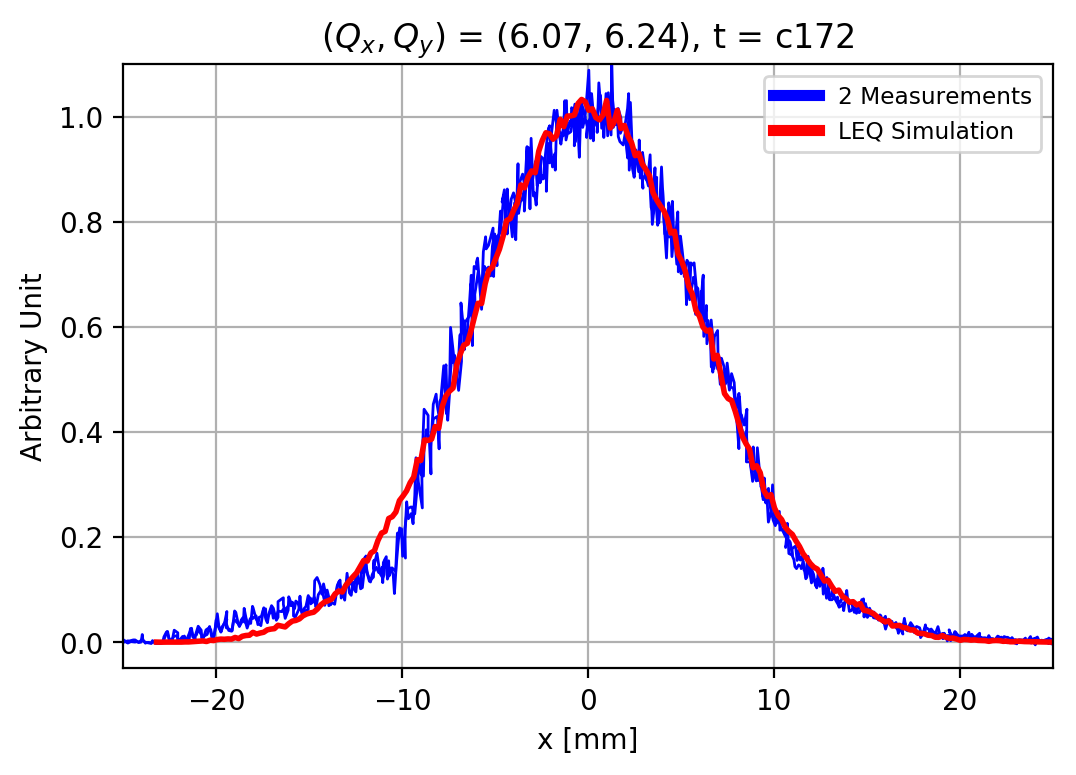

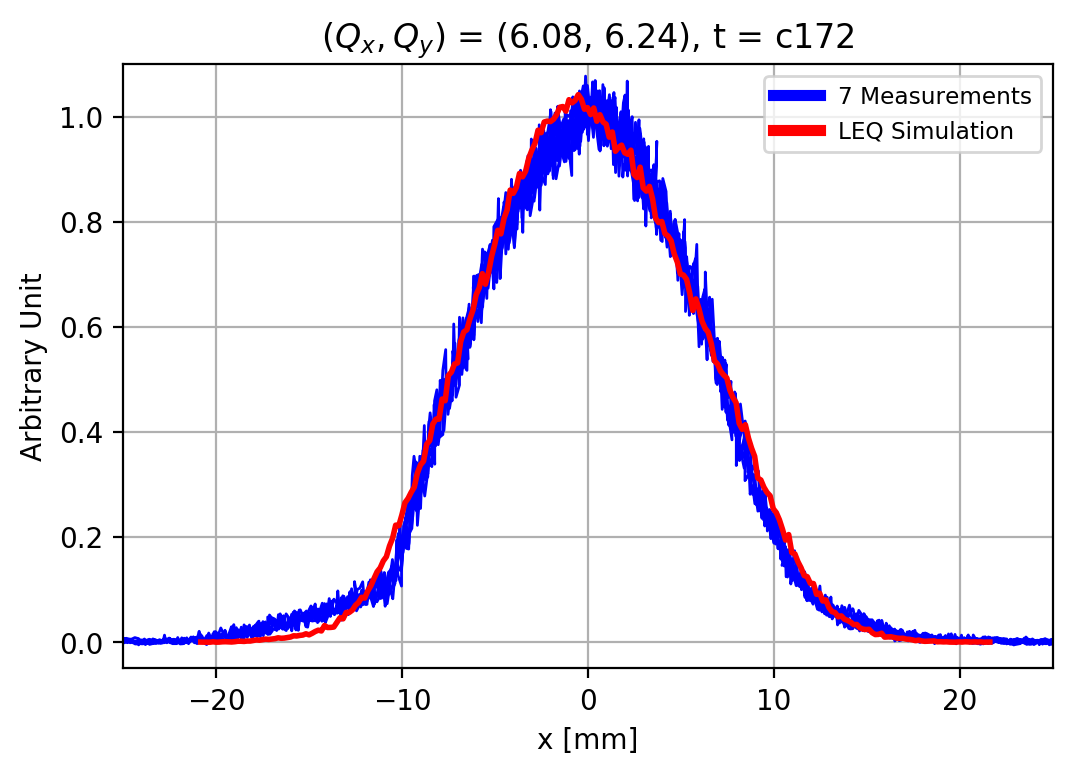

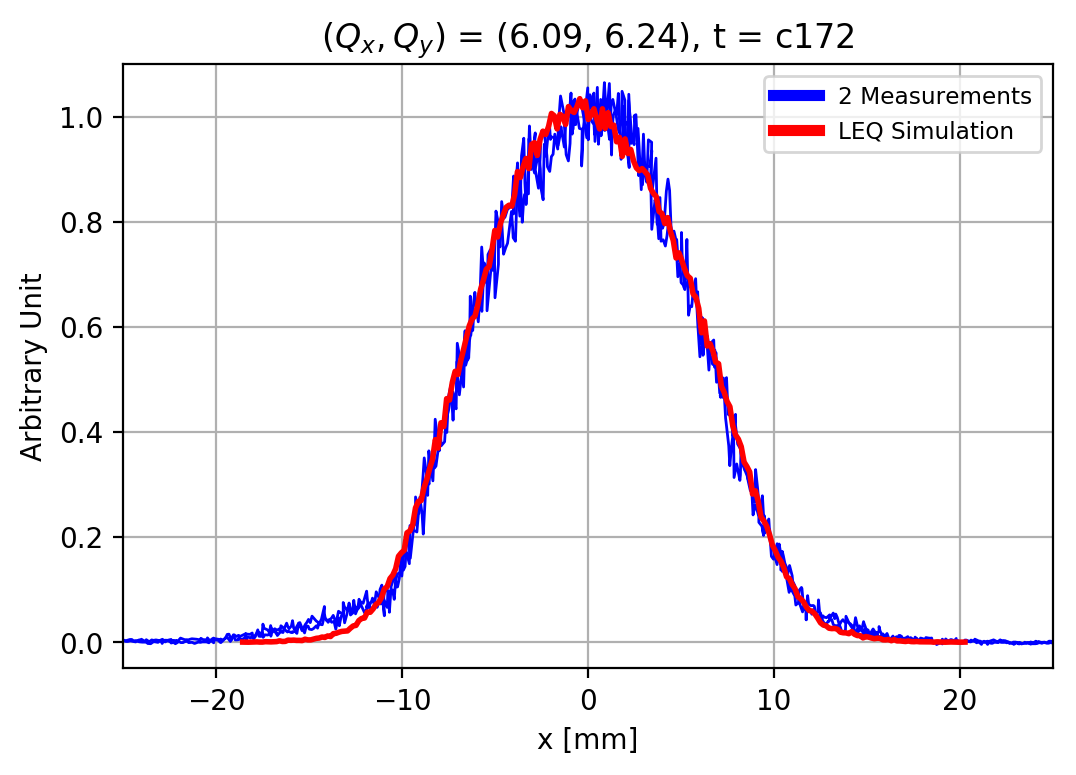

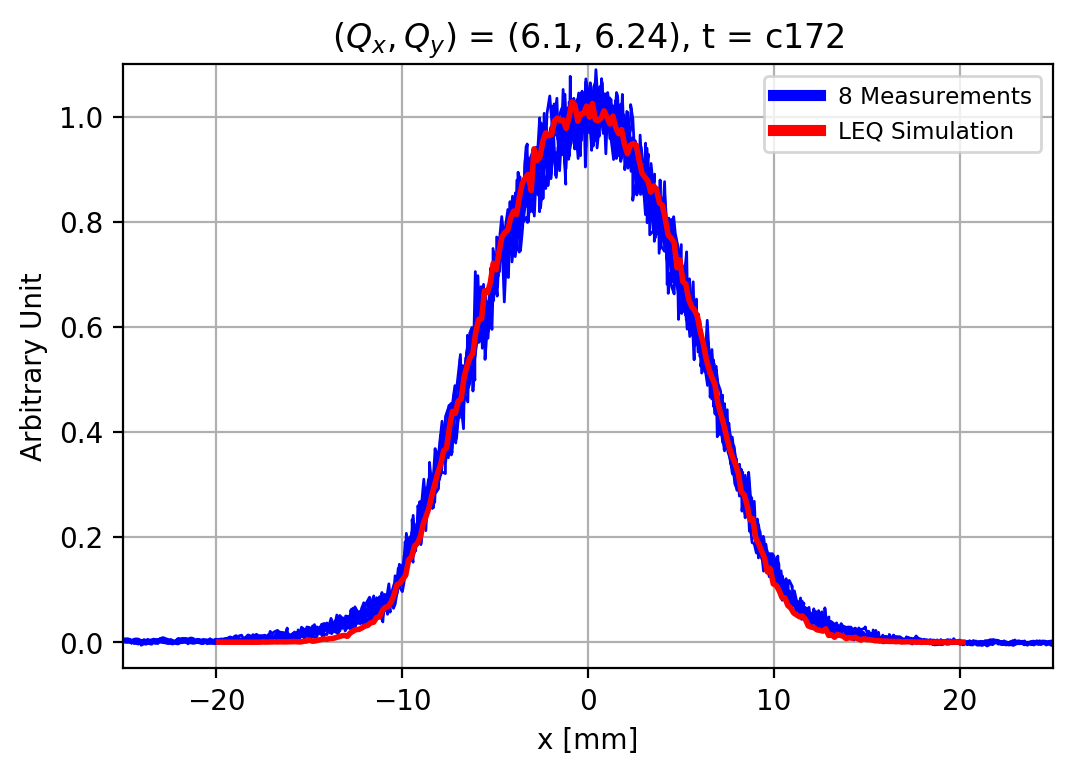

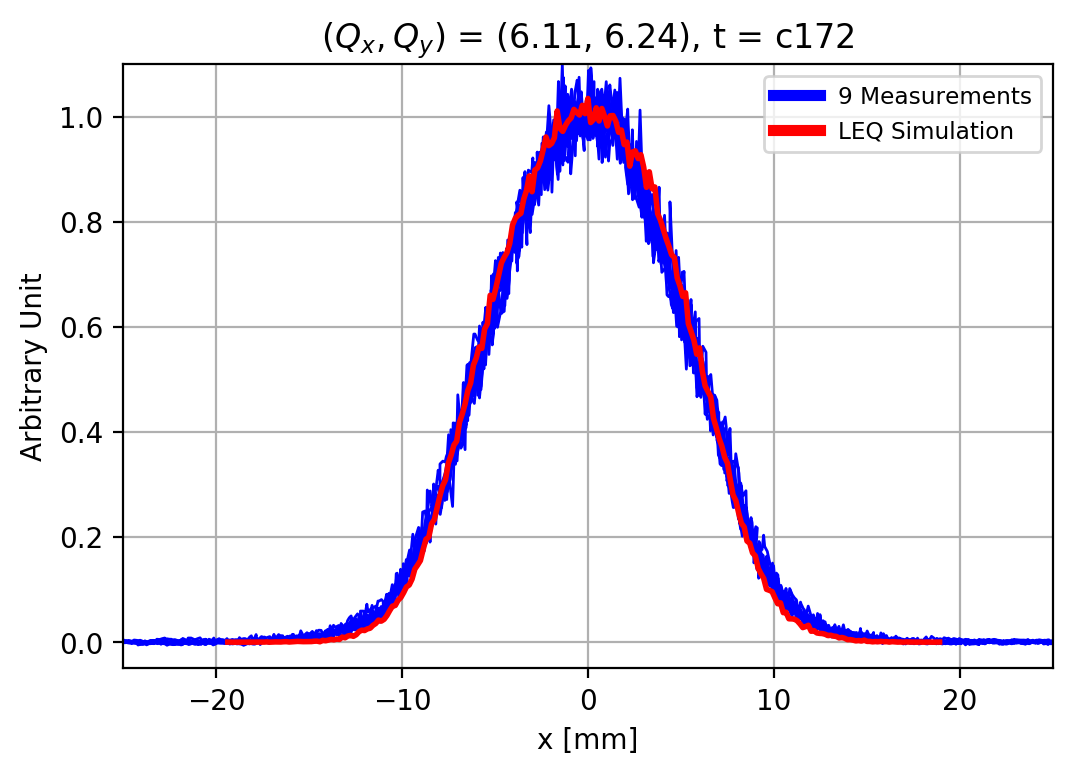

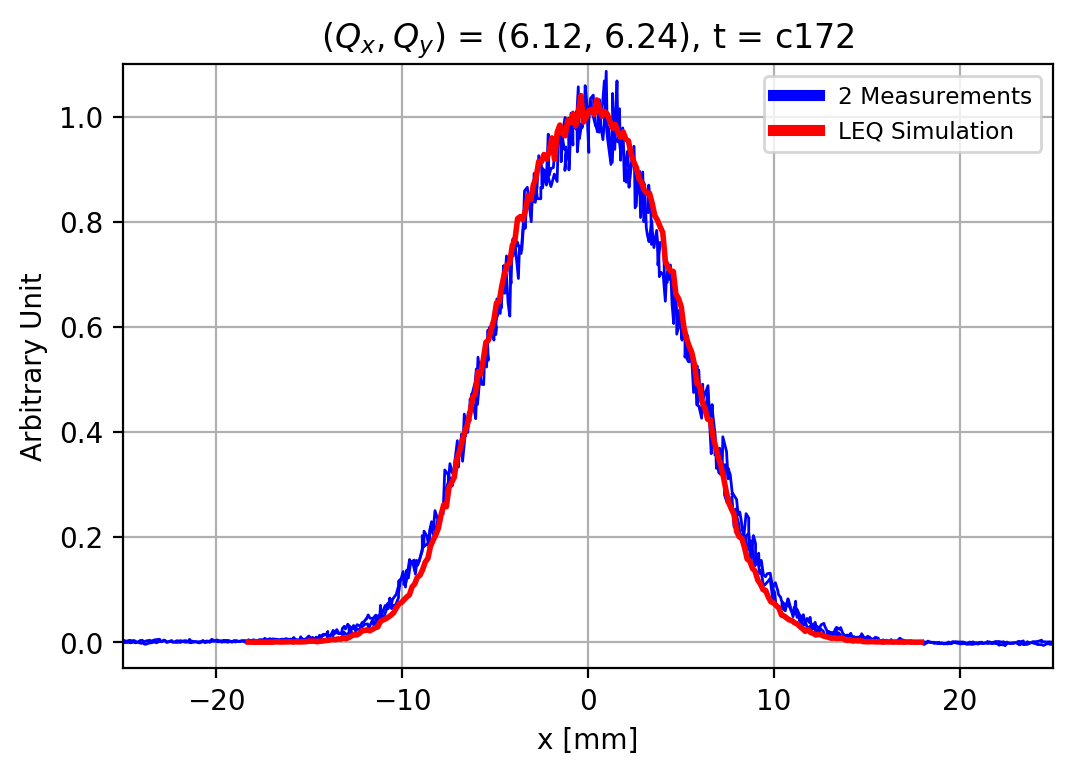

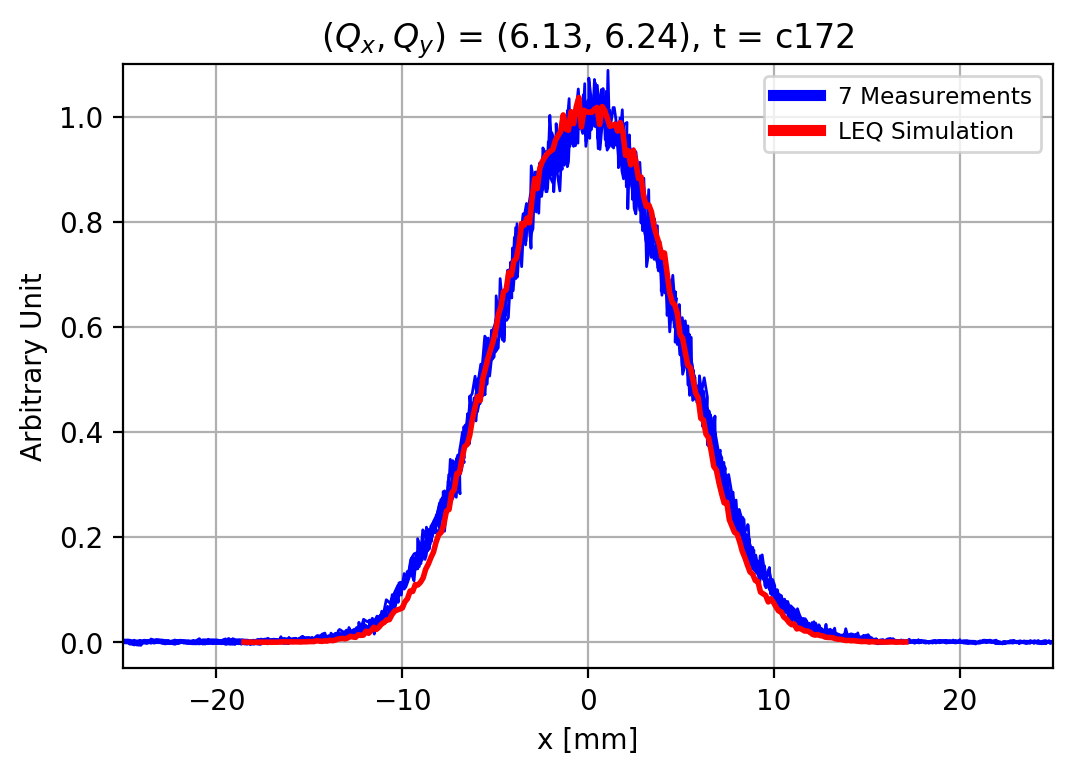

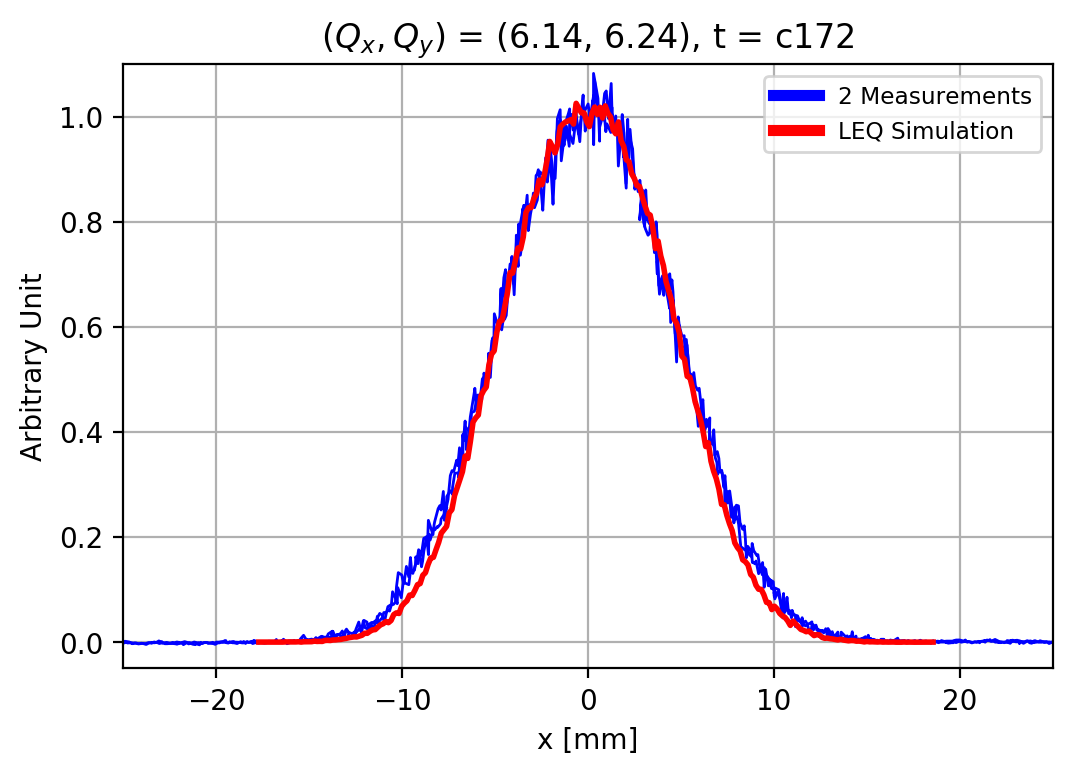

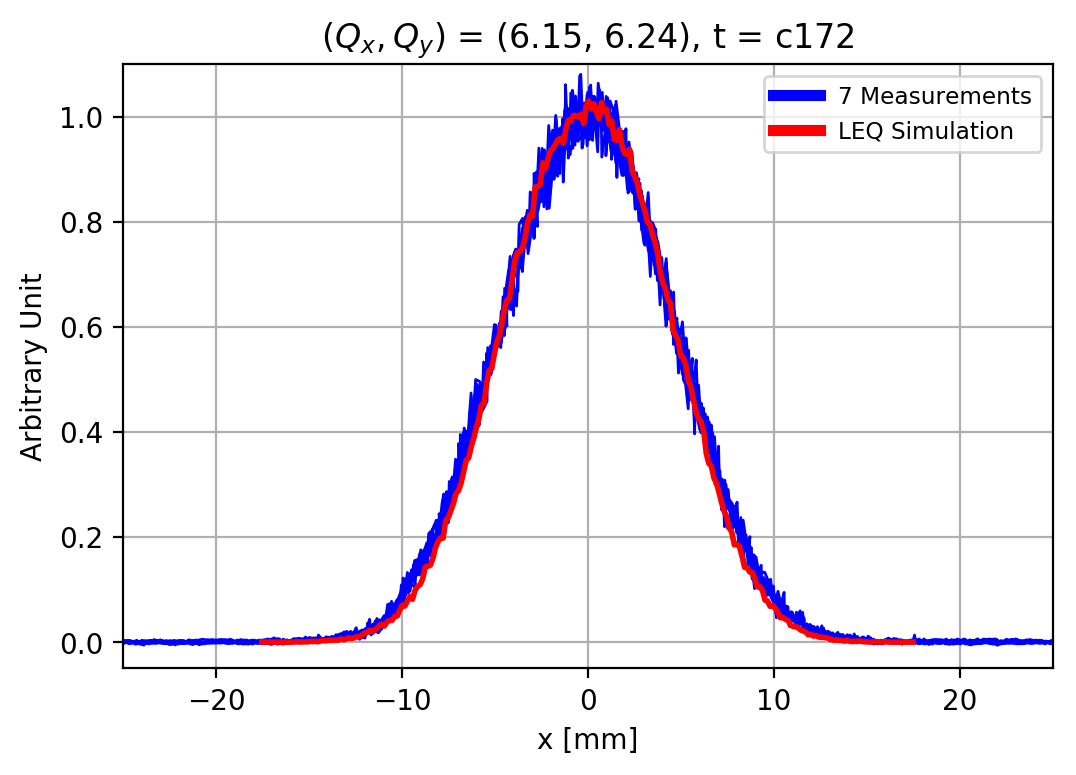

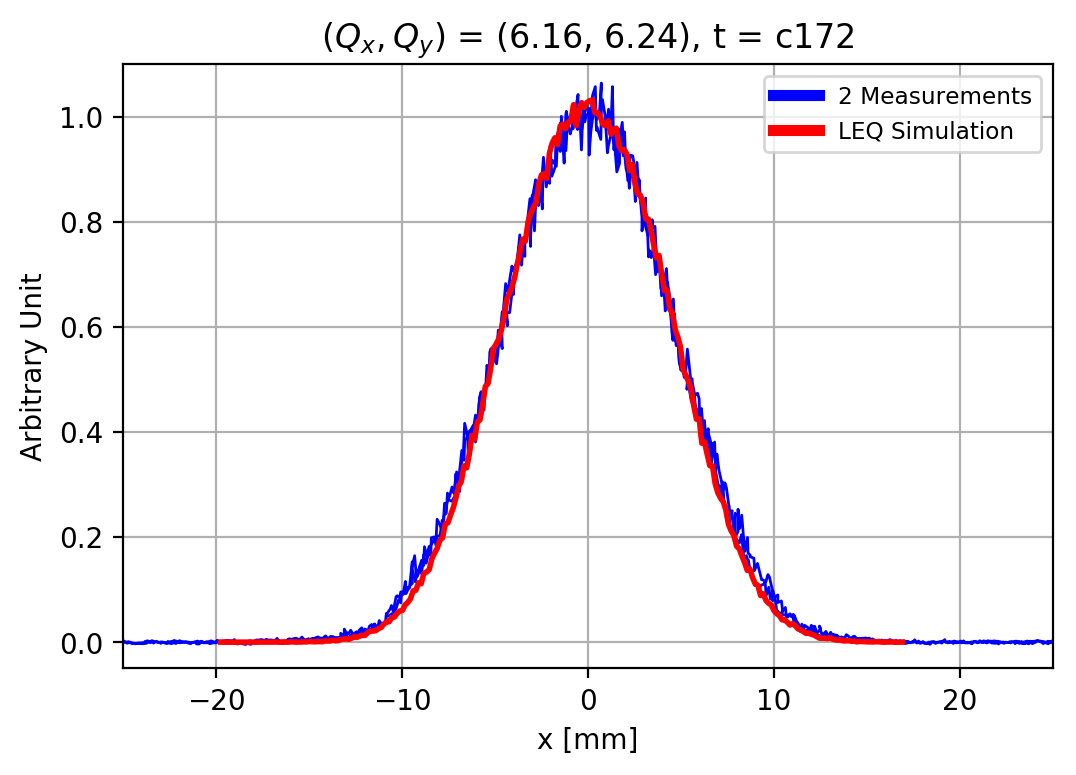

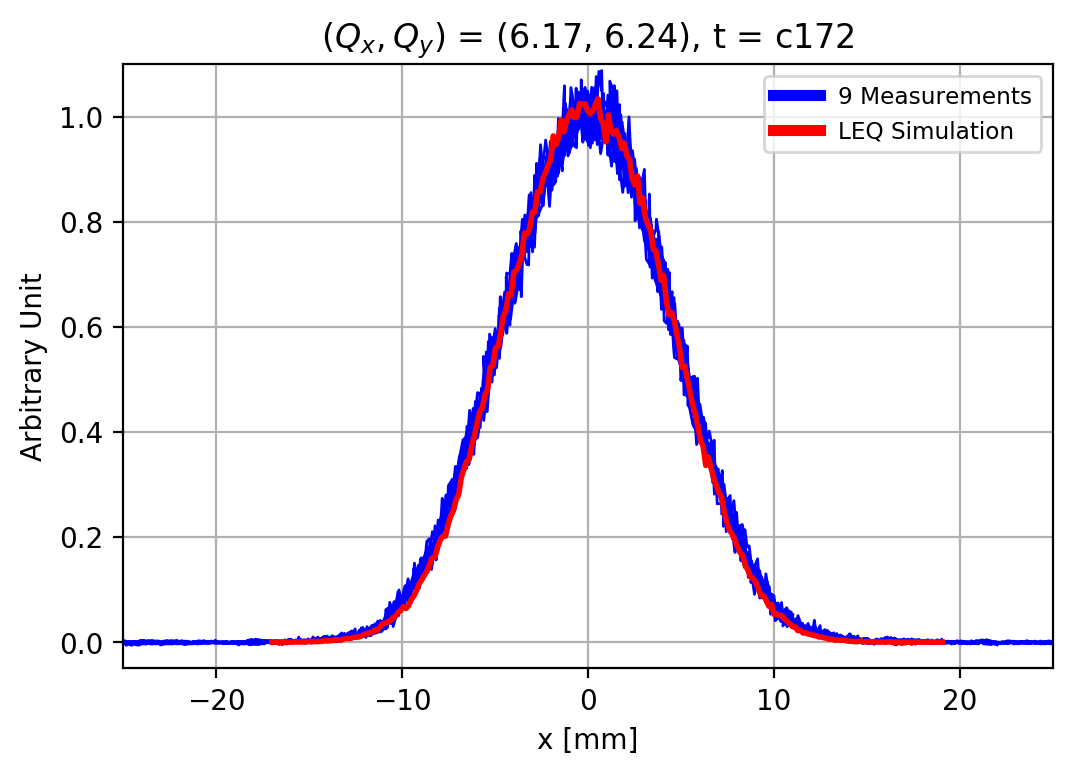

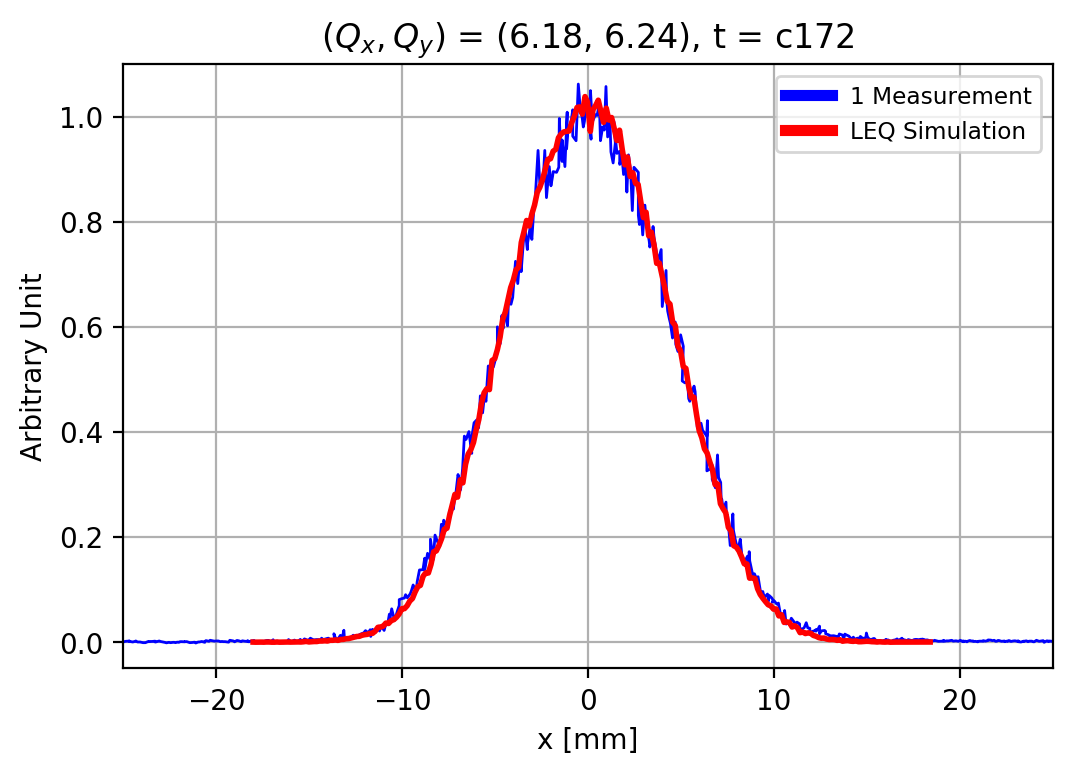

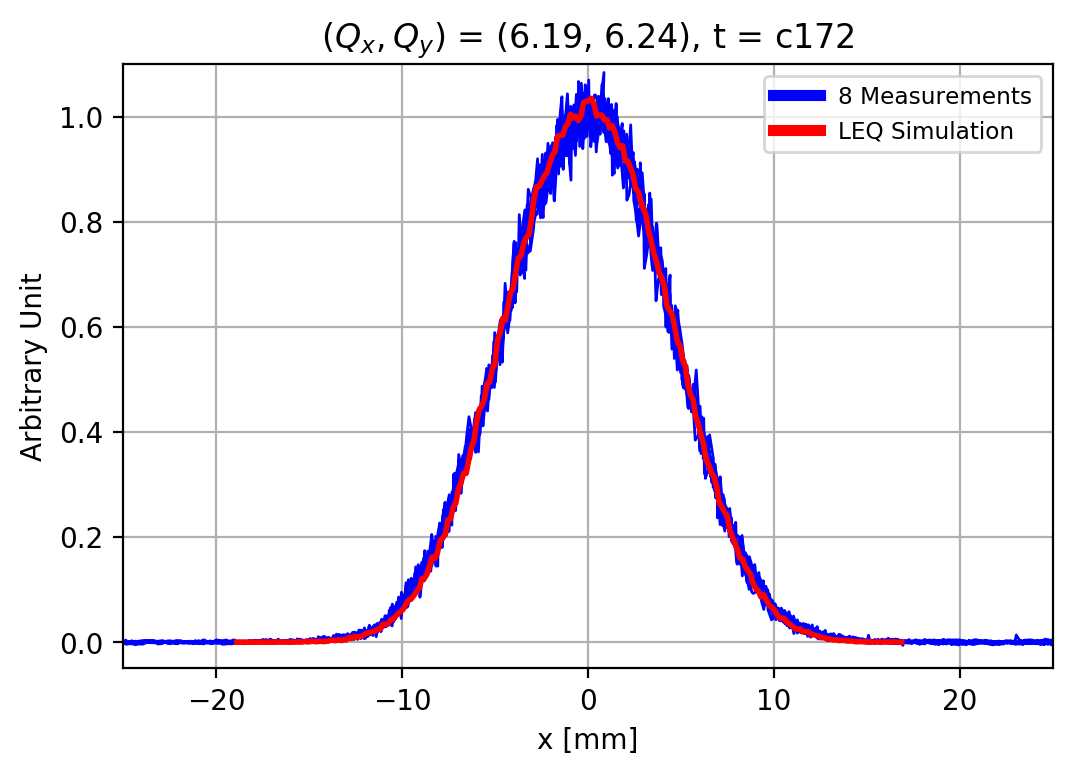

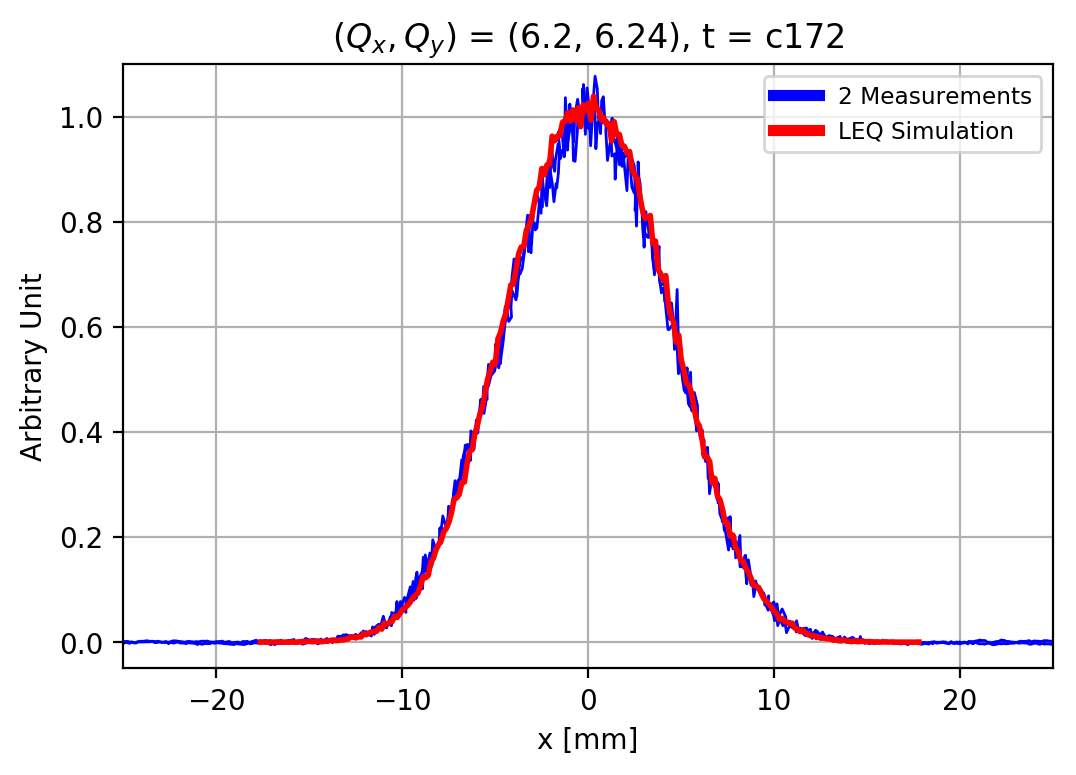

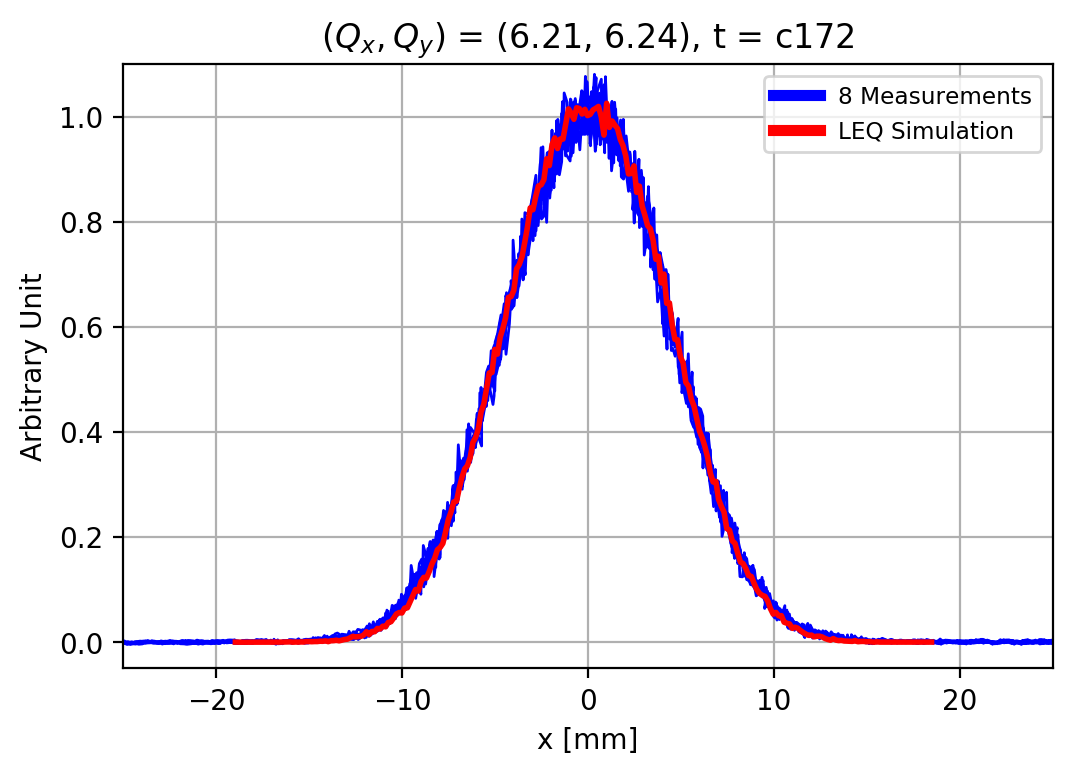

In [17]:
#Main function to plot comparison plots with MD data
verbose = True

plotted_names = []

for key, value in sorted(sims_tomo.iteritems()):
    if key not in plotted_names:        
        
        plotted_names.append(key)
        
        this_plot = []
        this_plot.append(value)
        if verbose: print '\nImporting simulation file:', key        

        tune_x = 6.+float(key.split('_')[0])/100
        ctime = 'c172'
        time = 172.
        label = key
        if verbose: print 'Qx = ', tune_x, ', ctime =', time, '[ms], label = ', label
        
        sim_labels=['Simulation']

        # Find MD data with same tune and ctime    
        for key1, value1 in sorted(sims_tomo.iteritems()):
#             if verbose: print '\tChecking other files:', key1  
            tune_x1 = 6.+float(key1)
            ctime1 = 'c172'
            time1 = 172.
            label1 = key1
#             if verbose: print '\tQy = ', tune_x1, ', ctime =', time1, '[ms], label = ', label1
            if (tune_x1 == tune_x) and (time1 == time):
                if (label1 != label):
                    print '\tMATCH FOUND' 
                    print '\tQx = ', tune_x1, ', ctime =', time1, '[ms]'
                    print '\tlab = ', label, ', lab1 =', label1

                    this_plot.append(value1)
                    plotted_names.append(key1)
                    sim_labels.append(label1)

        # Find rows in dataframe at correct tune and WS time
        md_points = []
        for i in tune_points[tune_x]:
            if df0['PR.BWS.65.H_ROT:ACQ_DELAY'].iloc()[i] == time:
                md_points.append(i)          

        if verbose: print md_points                 

        # Plot data
        main_label = r'$(Q_x, Q_y)$ = (' + str(tune_x) + ', 6.24), t = ' + str(ctime)
        save_name = './H_Plots/WS_tomo/H_Scan_WS_cf_' + str(tune_x) + '_tomo'
        Plot_profiles_cf_sc_models_single(df0, md_points, particles_from_matfile(this_plot[0]), 0, main_label=main_label, save_name=save_name, bins=sim_hist_bins, sim_peak_points = 10, sim_labels=sim_labels, plot_md=True)  


In [ ]:
#Main function to plot comparison plots with MD data
verbose = True

plotted_names = []

for key, value in sorted(sims_BLonD.iteritems()):
    if key not in plotted_names:        
        
        plotted_names.append(key)
        
        this_plot = []
        this_plot.append(value)
        if verbose: print '\nImporting simulation file:', key        

        tune_x = 6.+float(key.split('_')[0])/100
        ctime = 'c172'
        time = 172.
        label = key
        if verbose: print 'Qx = ', tune_x, ', ctime =', time, '[ms], label = ', label
        
        sim_labels=['Simulation']

        # Find MD data with same tune and ctime    
        for key1, value1 in sorted(sims_BLonD.iteritems()):
#             if verbose: print '\tChecking other files:', key1  
            tune_x1 = 6.+float(key1)/100
            ctime1 = 'c172'
            time1 = 172.
            label1 = key1
#             if verbose: print '\tQy = ', tune_x1, ', ctime =', time1, '[ms], label = ', label1
            if (tune_x1 == tune_x) and (time1 == time):
                if (label1 != label):
                    print '\tMATCH FOUND' 
                    print '\tQx = ', tune_x1, ', ctime =', time1, '[ms]'
                    print '\tlab = ', label, ', lab1 =', label1

                    this_plot.append(value1)
                    plotted_names.append(key1)
                    sim_labels.append(label1)

        # Find rows in dataframe at correct tune and WS time
        md_points = []
        for i in tune_points[tune_x]:
            if df0['PR.BWS.65.H_ROT:ACQ_DELAY'].iloc()[i] == time:
                md_points.append(i)          

        if verbose: print md_points                 

        # Plot data
        main_label = r'$(Q_x, Q_y)$ = (' + str(tune_x) + ', 6.24), t = ' + str(ctime)
        save_name = './H_Plots/WS_BLonD/H_Scan_WS_cf_' + str(tune_x) + '_BLonD'
        Plot_profiles_cf_sc_models_single(df0, md_points, particles_from_matfile(this_plot[0]), 0, main_label=main_label, save_name=save_name, bins=sim_hist_bins, sim_peak_points = 10, sim_labels=sim_labels, plot_md=True)  


# Perform analysis on simulation data

In [ ]:
# Make dataframe with name, tunes, position V, profile V 
data = []
dpp_ = 8.45E-4

# Each row as a list
for key, value in sorted(sims_tomo.iteritems()):
    
    tune_y = float(key.split('_')[0])/100
    time = 172
    if verbose: print 'Qx = ', tune_y, ', time =', time, '[ms]'

    d = particles_from_matfile(value)
    plt.clf()
    x1, bins_1, p1 = plt.hist(d['particles']['x'][0][0][0], bins = 500, density=True, histtype=u'step', lw=1.5, color='k')
          
    qy = 6.24
    qx = tune_y
    pos = np.array(bins_1[:-1]) + (abs(bins_1[0]-bins_1[1])/2)
    prof = x1
    
    new_data = [qx, qy, pos, prof, dpp_]
    
    data.append(new_data)    

# Create dataframe
df_sim_tomo = pnd.DataFrame(data, columns = ['Qx', 'Qy', 'PR.BWS.65.H_ROT:PROF_POSITION_IN', 'PR.BWS.65.H_ROT:PROF_DATA_IN', 'dpp'])

In [ ]:
# Make dataframe with name, tunes, position V, profile V 
data = []
dpp_ = 7.65E-4

# Each row as a list
for key, value in sorted(sims_BLonD.iteritems()):
    
    tune_y = float(key.split('_')[0])/100
    time = 172
    if verbose: print 'Qx = ', tune_y, ', time =', time, '[ms]'

    d = particles_from_matfile(value)
    plt.clf()
    x1, bins_1, p1 = plt.hist(d['particles']['x'][0][0][0], bins = 500, density=True, histtype=u'step', lw=1.5, color='k')
          
    qy = 6.24
    qx = tune_y
    pos = np.array(bins_1[:-1]) + (abs(bins_1[0]-bins_1[1])/2)
    prof = x1
    
    new_data = [qx, qy, pos, prof, dpp_]
    
    data.append(new_data)    

# Create dataframe
df_sim_BLonD = pnd.DataFrame(data, columns = ['Qx', 'Qy', 'PR.BWS.65.H_ROT:PROF_POSITION_IN', 'PR.BWS.65.H_ROT:PROF_DATA_IN', 'dpp'])

In [ ]:
# Gaussian and 2nd moment fits
df_sim_tomo_filtered = Multi_filter_sim(df_sim_tomo, with_plot = True, WS = '65.H', smooth=True)
df_sim_BLonD_filtered = Multi_filter_sim(df_sim_BLonD, with_plot = True, WS = '65.H', smooth=True)

In [ ]:
df_sim_tomo_emittance = emittance_df(df_sim_tomo_filtered, WS='65.H', verbose=True)
df_sim_BLonD_emittance = emittance_df(df_sim_BLonD_filtered, WS='65.H', verbose=True)

In [ ]:
df_sim_tomo_emittance_2 = emittance_df_2(df_sim_tomo_emittance, WS='65.H', verbose=True)
df_sim_BLonD_emittance_2 = emittance_df_2(df_sim_BLonD_emittance, WS='65.H', verbose=True)

In [ ]:
df_sim_tomo_emittance_2.to_pickle('./H_Sim_Dataframes/tomo_Simulation_data_mini.pkl')
df_sim_BLonD_emittance_2.to_pickle('./H_Sim_Dataframes/BLonD_Simulation_data_mini.pkl')

# Plots

In [ ]:
df0_sim = df_sim_tomo_emittance_2

# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_172.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
y_error_172[11] = max(y_error_172)
    
plt.errorbar(x_data, y_data_172, y_error_172, label='Measurement @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.plot(6.+df0_sim['Qx'], df0_sim['emittance H 2ndMoment'], label='Simulation @ 172 ms', linestyle='None', marker='o', color='r', markersize=5)

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\mu\prime_x^2 - D_x^2 \left(\frac{\delta p}{p} \right)^2}{\beta_{x}(s)}$')
#plt.title(r'$\epsilon_{x,y} = \beta\gamma \frac{\mu\prime^2}{\beta_{x,y}(s)}$')

# plt.ylim(0.5, 3.5)
plt.ylim(0.5, 4)

plt.legend();
plt.grid();
fig.savefig('H_Plots/H_Emitt_CF_tomo.png');

In [ ]:
df0_sim = df_sim_BLonD_emittance_2

# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_172.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
y_error_172[11] = max(y_error_172)
    
plt.errorbar(x_data, y_data_172, y_error_172, label='Measurement @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')

plt.plot(6.+df0_sim['Qx'], df0_sim['emittance H 2ndMoment'], label='Simulation @ 172 ms', linestyle='None', marker='o', color='r', markersize=5)

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\mu\prime_x^2 - D_x^2 \left(\frac{\delta p}{p} \right)^2}{\beta_{x}(s)}$')
#plt.title(r'$\epsilon_{x,y} = \beta\gamma \frac{\mu\prime^2}{\beta_{x,y}(s)}$')

# plt.ylim(0.5, 3.5)
plt.ylim(0.5, 4)

plt.legend();
plt.grid();
fig.savefig('H_Plots/H_Emitt_CF_BLonD.png');

In [ ]:
df0_sim = df_sim_BLonD_emittance_2

# Plot averaged data points with error bars
fig=plt.figure(figsize=(8, 4), dpi= 200, facecolor='w', edgecolor='k');
x_data = np.linspace(607, 621, 15);
x_data = x_data/100;

y_data_172 = []
y_error_172 = []

for i in x_data:
    
    upper_lim = i+0.0049999999999 - 6
    lower_lim = i-0.0049999999999 - 6
    
    y_data_172.append( np.mean( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    y_error_172.append( np.std( df0['emittance H 2ndMoment'][(df0['PR.BWS.65.H_ROT:ACQ_DELAY']==172)][(df0['Qx']>lower_lim)][(df0['Qx']<upper_lim)] ) )
    
y_error_172[11] = max(y_error_172)
    
plt.errorbar(x_data, y_data_172, y_error_172, label='Measurement @ 172 ms', linestyle='None', marker='o', capsize=3, color='b')
plt.plot(6.+df_sim_BLonD_emittance_2['Qx'], df_sim_BLonD_emittance_2['emittance H 2ndMoment'], label='BLonD Simulation @ 172 ms', linestyle='None', marker='o', color='g', markersize=5)
plt.plot(6.+df_sim_tomo_emittance_2['Qx'], df_sim_tomo_emittance_2['emittance H 2ndMoment'], label='tomo Simulation @ 172 ms', linestyle='None', marker='o', color='m', markersize=5)

plt.xlabel('Qx');
plt.ylabel('Horizontal Emittance [mm mrad]');

plt.title(r'$\epsilon_{x} = \beta\gamma \frac{\mu\prime_x^2 - D_x^2 \left(\frac{\delta p}{p} \right)^2}{\beta_{x}(s)}$')
#plt.title(r'$\epsilon_{x,y} = \beta\gamma \frac{\mu\prime^2}{\beta_{x,y}(s)}$')

# plt.ylim(0.5, 3.5)
plt.ylim(0.5, 4)

plt.legend();
plt.grid();
fig.savefig('H_Plots/H_Emitt_CF_both.png');